In [1]:
# import packages
import os
import tarfile
import urllib
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

TEAM_PATH = './resources/teams/michiganStateTeam.csv'

In [2]:
def load_data(path=TEAM_PATH):
    return pd.read_csv(path,header=0)

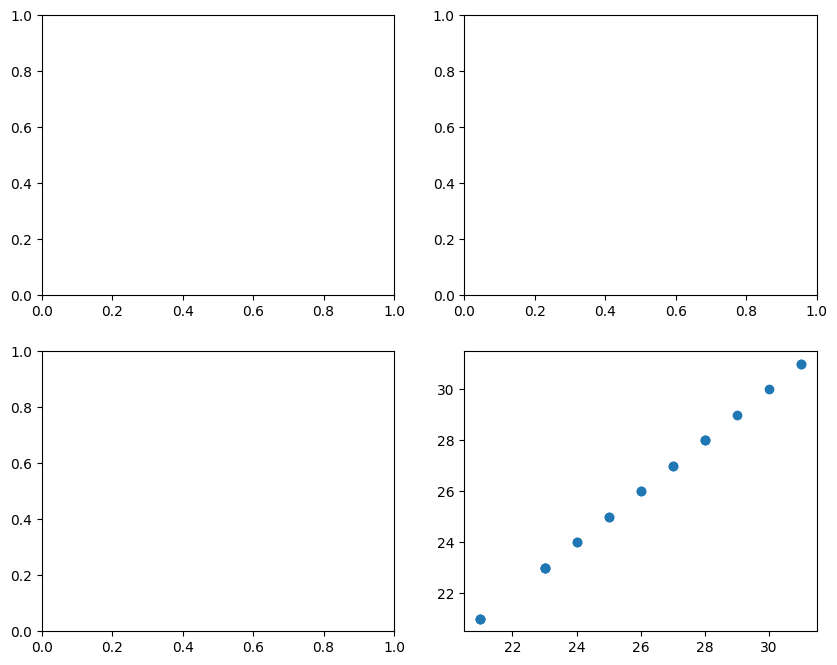

In [3]:
teamData = load_data()
teamData.head()
labels = teamData["Tm"].copy().values

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))



entry = teamData["FG"].copy().values
fg = teamData["FG"].copy().values

# # loop over the axis objects and plot a scatter plot
# for row in ax:
#     for col in row:
#         for colName, colData in teamData.iteritems():
#             col.scatter(teamData[colName], entry)
plt.scatter(entry,fg)
plt.show()

In [4]:
features = teamData.drop("Tm",axis=1)
features.drop(columns=['Opp','W/L','G','Date','Court'],inplace=True)
for colName, colData in features.iteritems():
    if '%' in colName:
        features.drop(colName, axis=1, inplace=True)
labels = teamData["Tm"].copy()

C:\Users\rykun\AppData\Local\Temp\ipykernel_8088\3610667240.py:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for colName, colData in features.iteritems():


In [5]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = "median")),
    ('std_scaler', StandardScaler())
])
featuresScaled = num_pipeline.fit_transform(features)

train_features, test_features, train_labels, test_labels = train_test_split(
    featuresScaled, labels, test_size=0.2, random_state=42
)

In [6]:
# Fit the RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(train_features, train_labels)

# Make predictions on the test set
predictions = rf_reg.predict(test_features)

In [7]:

print("Predictions:", predictions)
print("Labels:", list(test_labels))

mse = mean_squared_error(test_labels, predictions)
rmse = np.sqrt(mse)
print("MSE:", rmse)


Predictions: [72.22 74.53 66.39 63.91 65.1 ]
Labels: [73, 74, 63, 63, 69]
MSE: 2.3840931189867582


In [8]:
"""
Opp,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF

70,23,55,8,22,9,12,6,27,16,7,4,13,17
"""
line = [[70,23,55,8,22,9,12,6,27,16,7,4,13,17]]
print(rf_reg.predict(line))


[84.58]
